In [23]:
# PARA EL DESARROLLO DE ESTA FASE 3 SE REALIZA EN PYTHON EN JUPYTERLAB.
# PRIMERO IMPORTAMOS LAS LIBRERIAS Y COMPROBAMOS LOS FICHEROS

import numpy as np 
import pandas as pd 
import seaborn as sns
import os
import matplotlib.pyplot as plt

pd.options.mode.chained_assignment = None

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [24]:
# CARGAMOS LOS DATOS EN DATAFRAMES Y BUSCAMOS LA RUTA PARA ACCEDER A LA INFORMACION DEL DATASET DEL TITANIC.
# TAMBIEN DEFINIMOS LA VARIABLE
train_data = pd.read_csv("/Users/Maira/Downloads/Dataset_Titanic/train.csv")
test_data = pd.read_csv("/Users/Maira/Downloads/Dataset_Titanic/test.csv")

In [3]:
# BUSCAMOS Y OBSERVAMOS LOS PRIMEROS 5 DATOS DEL ARCHIVO DEL TITANIC
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# OBSERVAMOS LAS ESTADISTICAS GENERALES
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
#Nulos (Nulls)
train_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
# RELLENAMOS LOS VALORES NULOS

#train
train_data['Age'] = train_data['Age'].fillna(train_data['Age'].median())
train_data['Cabin'] = train_data['Cabin'].fillna('NotSet')
train_data['Embarked'] = train_data['Embarked'].fillna('N')
#test
test_data['Age'] = test_data['Age'].fillna(test_data['Age'].median())
test_data['Cabin'] = test_data['Cabin'].fillna('NotSet')
test_data['Embarked'] = test_data['Embarked'].fillna('N')

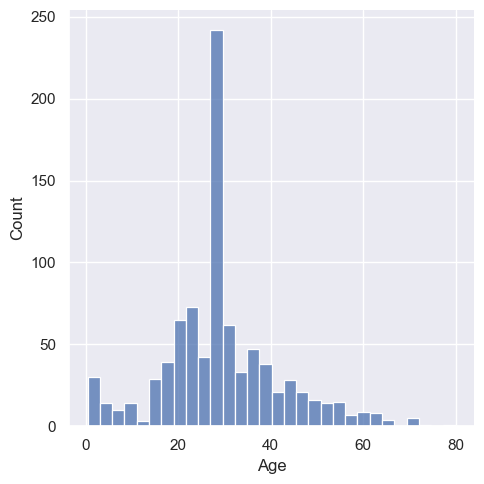

In [7]:
# AQUI OBSERVAMOS LA DISTRIBUCION DE LAS EDADES, CON UN PROMEDIO DE 0 A 80 AÑOS DE EDAD
sns.set(color_codes=True)
sns.displot(train_data['Age'])

In [8]:
# AQUI OBSERVAMOS LA SUPERVIVENCIA SEGUN EL SEXO.
# SE OBSERVA QUE SOBREVIVEN MAS MUJERES QUE HOMBRES.
train_data[['Sex','Survived']].groupby('Sex').sum()#.values.tolist()

,Survived
Sex,
female,233
male,109


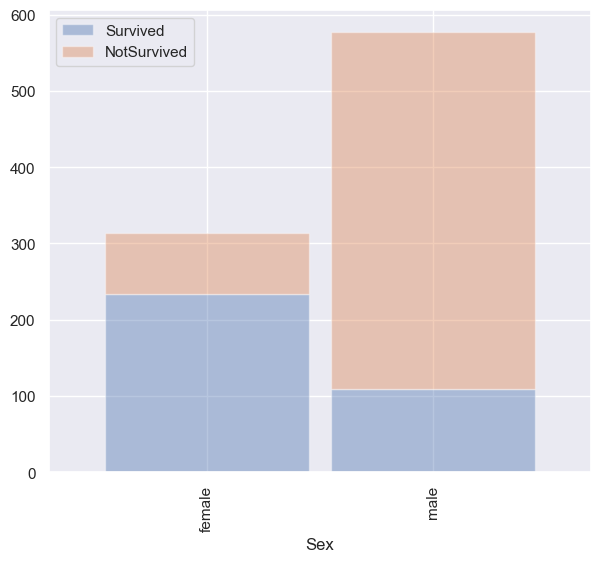

In [9]:
# AQUI PODEMOS OBSERVAR MEDIANTE UNA GRAFICA DE BARRAS LA CANTIDAD DE MUJERES Y HOMBRES QUE FALLECIERON.
# TAMBIEN SE OBSERVA LA CANTIDAD DE MUJERES Y HOMBRES QUE SOBREVIVEN SEGUN LA ESTADISTICA DEL ARCHIVO. 
# SE CONCLUYE Y SE OBSERVA QUE FALLECIERON MAS HOMBRES QUE MUJERES.
# EL COLOR AZUL IDENTIFICA LAS PERSONAS QUE SOBREVIVIERON Y EL NARANJA LAS QUE NO SOBREVIVIERON. 

df_survivedsex=train_data[['Sex','Survived']]

def superviviente (row):
    if row['Survived'] == 1 :
        return 0
    else:
        return 1

df_survivedsex['NotSurvived']=df_survivedsex.apply (lambda row: superviviente(row), axis=1)

df_survivedsex=df_survivedsex.groupby('Sex').sum()

df_survivedsex.plot(kind = 'bar' 
             , stacked = 'True'          # Muestra las barras apiladas
             , alpha = 0.4               # nivel de transparencia
             , width = 0.9               # Grosor de las barras para dejar espacio entre ellas
             ,figsize=(7,6)              # Cambiamos el tamaño de la figura
            );   

In [10]:
# AQUI SE PUEDE OBSERVAR LA CANTIDAD DE PERSONAS QUE SOBREVIVIERON SEGUN LA CLASE A LA QUE PERTENECIAN.
# ALLI SE EVIDENCIA QUE SOBREVIVIERON MAS PERSONAS PERTENECIENTES A LA CLASE 1. 

train_data[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


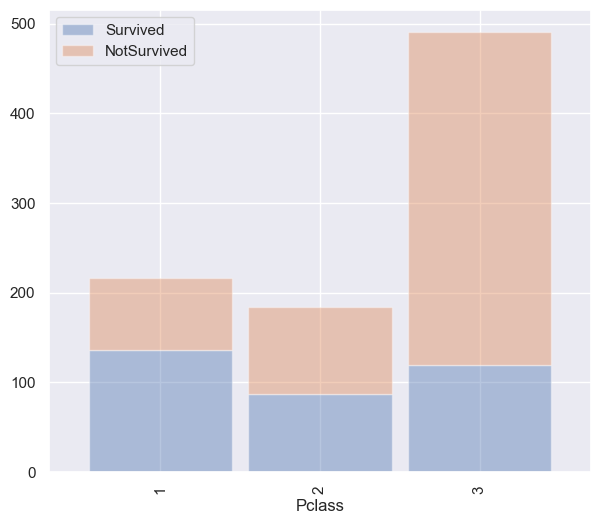

In [11]:
# SE REALIZA UNA GRAFICA DE BARRAS CON LAS PERSONAS QUE SOBREVIVIERON Y LAS QUE NO SEGUN LA CLASE.
# SE OBSERVA QUE FALLECIERON MAS PERSONAS DE CLASE 3 (ALTA) 
# Y QUE SOBREVIVIERON MAS PERSONAS DE CLASE 1 Y 2 (BAJA Y MEDIA).

df_survivedclass=train_data[['Pclass','Survived']]
df_survivedclass['NotSurvived']=df_survivedclass.apply (lambda row: superviviente(row), axis=1)
df_survivedclass=df_survivedclass.groupby('Pclass').sum()

df_survivedclass.plot(kind = 'bar', 
             stacked = 'True',          # Muestra las barras apiladas
             alpha = 0.4,               # nivel de transparencia
             width = 0.9,               # Grosor de las barras para dejar espacio entre ellas
             figsize=(7,6));            # Cambiamos el tamaño de la figura

In [12]:
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NotSet,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NotSet,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NotSet,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NotSet,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,NotSet,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


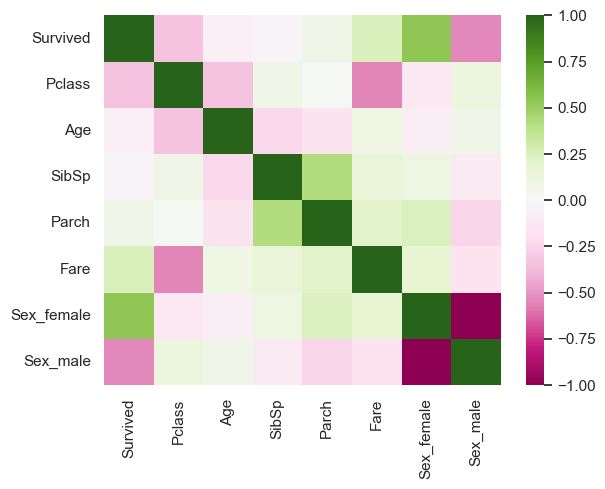

In [13]:
# SE REALIZA UN MAPA DE CALOR CON TODAS LAS VARIABLES DEL ARCHIVO Y CADA UNA DE ELLAS 
# CON SUS DATOS.

df_mapa=train_data[['Survived','Pclass','Sex','Age','SibSp','Parch','Fare']]
df_mapa=pd.get_dummies(df_mapa, columns=['Sex'])
ax = sns.heatmap(df_mapa.corr(), cmap="PiYG")

In [14]:
#Borramos Id, Ticket y name. Pensamos que no son relevantes
train_data_2 = train_data.drop(["PassengerId","Ticket","Name"], axis=1)
test_data_2 = test_data.drop(["PassengerId","Ticket","Name"], axis=1)

#Categorias a columnas
train_data_2 = pd.get_dummies(train_data_2, columns=["Sex", "Cabin", "Embarked"])
test_data_2 = pd.get_dummies(test_data_2, columns=["Sex", "Cabin", "Embarked"])

#Rellenamos los nulos con la media
train_data_2 = train_data_2.fillna(train_data_2.mean())
test_data_2 = test_data_2.fillna(test_data_2.mean())

test_data_2 = test_data_2.reindex(columns = train_data_2.columns, fill_value=0)
test_data_2=test_data_2.drop(['Survived'], axis=1)

#Separamos el dataset en entrenamiento y validación
from sklearn.model_selection import train_test_split
#X, Y = imputeddata.drop(["Survived"], axis=1), imputeddata["Survived"]
Xtrain, Xtest, Ytrain, Ytest = train_test_split(train_data_2.drop(["Survived"], axis=1), train_data_2["Survived"], test_size=0.33)

In [15]:
# CREAMOS EL ARBOL DE DECISIONES DEL DATASET DEL TITANIC
from sklearn.tree import DecisionTreeClassifier

#Creamos instancia de DecisionTree
decisiontree = DecisionTreeClassifier()

In [16]:
from sklearn import tree
from graphviz import Source

# APLICAMOS LA FUNCION QUE RETORNA LA VISUALIZACION DEL ARBOL.

def plottree(decisiontree, features_names=None, class_names=None):
    """Returns a graphviz visualization of a scikit-learn decision tree
    
    Inputs
        - decisiontree: tree to visualize
        - feature_names: iterable with the names of the features present in the data.
        - class_names: iterable with the names of the classes present in the data, in increasing order.
        
    If the call to this function is the last line of a notebook cell, the tree is rendered automatically.
    """
    dot_data = tree.export_graphviz(
        decisiontree, 
        out_file=None, 
        filled=True, 
        rounded=True, 
        rotate=True,
        feature_names=features_names,
        class_names=class_names
    )
    return Source(dot_data)

In [17]:
# ENTRENAMOS EL MODELO DEL ARBOL
decisiontree = DecisionTreeClassifier()
decisiontree.fit(Xtrain, Ytrain)

DecisionTreeClassifier()

In [18]:
# BUSCAMOS PRECISAR LA INFORMACION SEGUN EL MODELO
from sklearn.metrics import accuracy_score

Ypred = decisiontree.predict(Xtest)
decision_tree_model_acc = accuracy_score(Ypred, Ytest) * 100
print("Accuracy:", decision_tree_model_acc)

Accuracy: 80.33898305084746


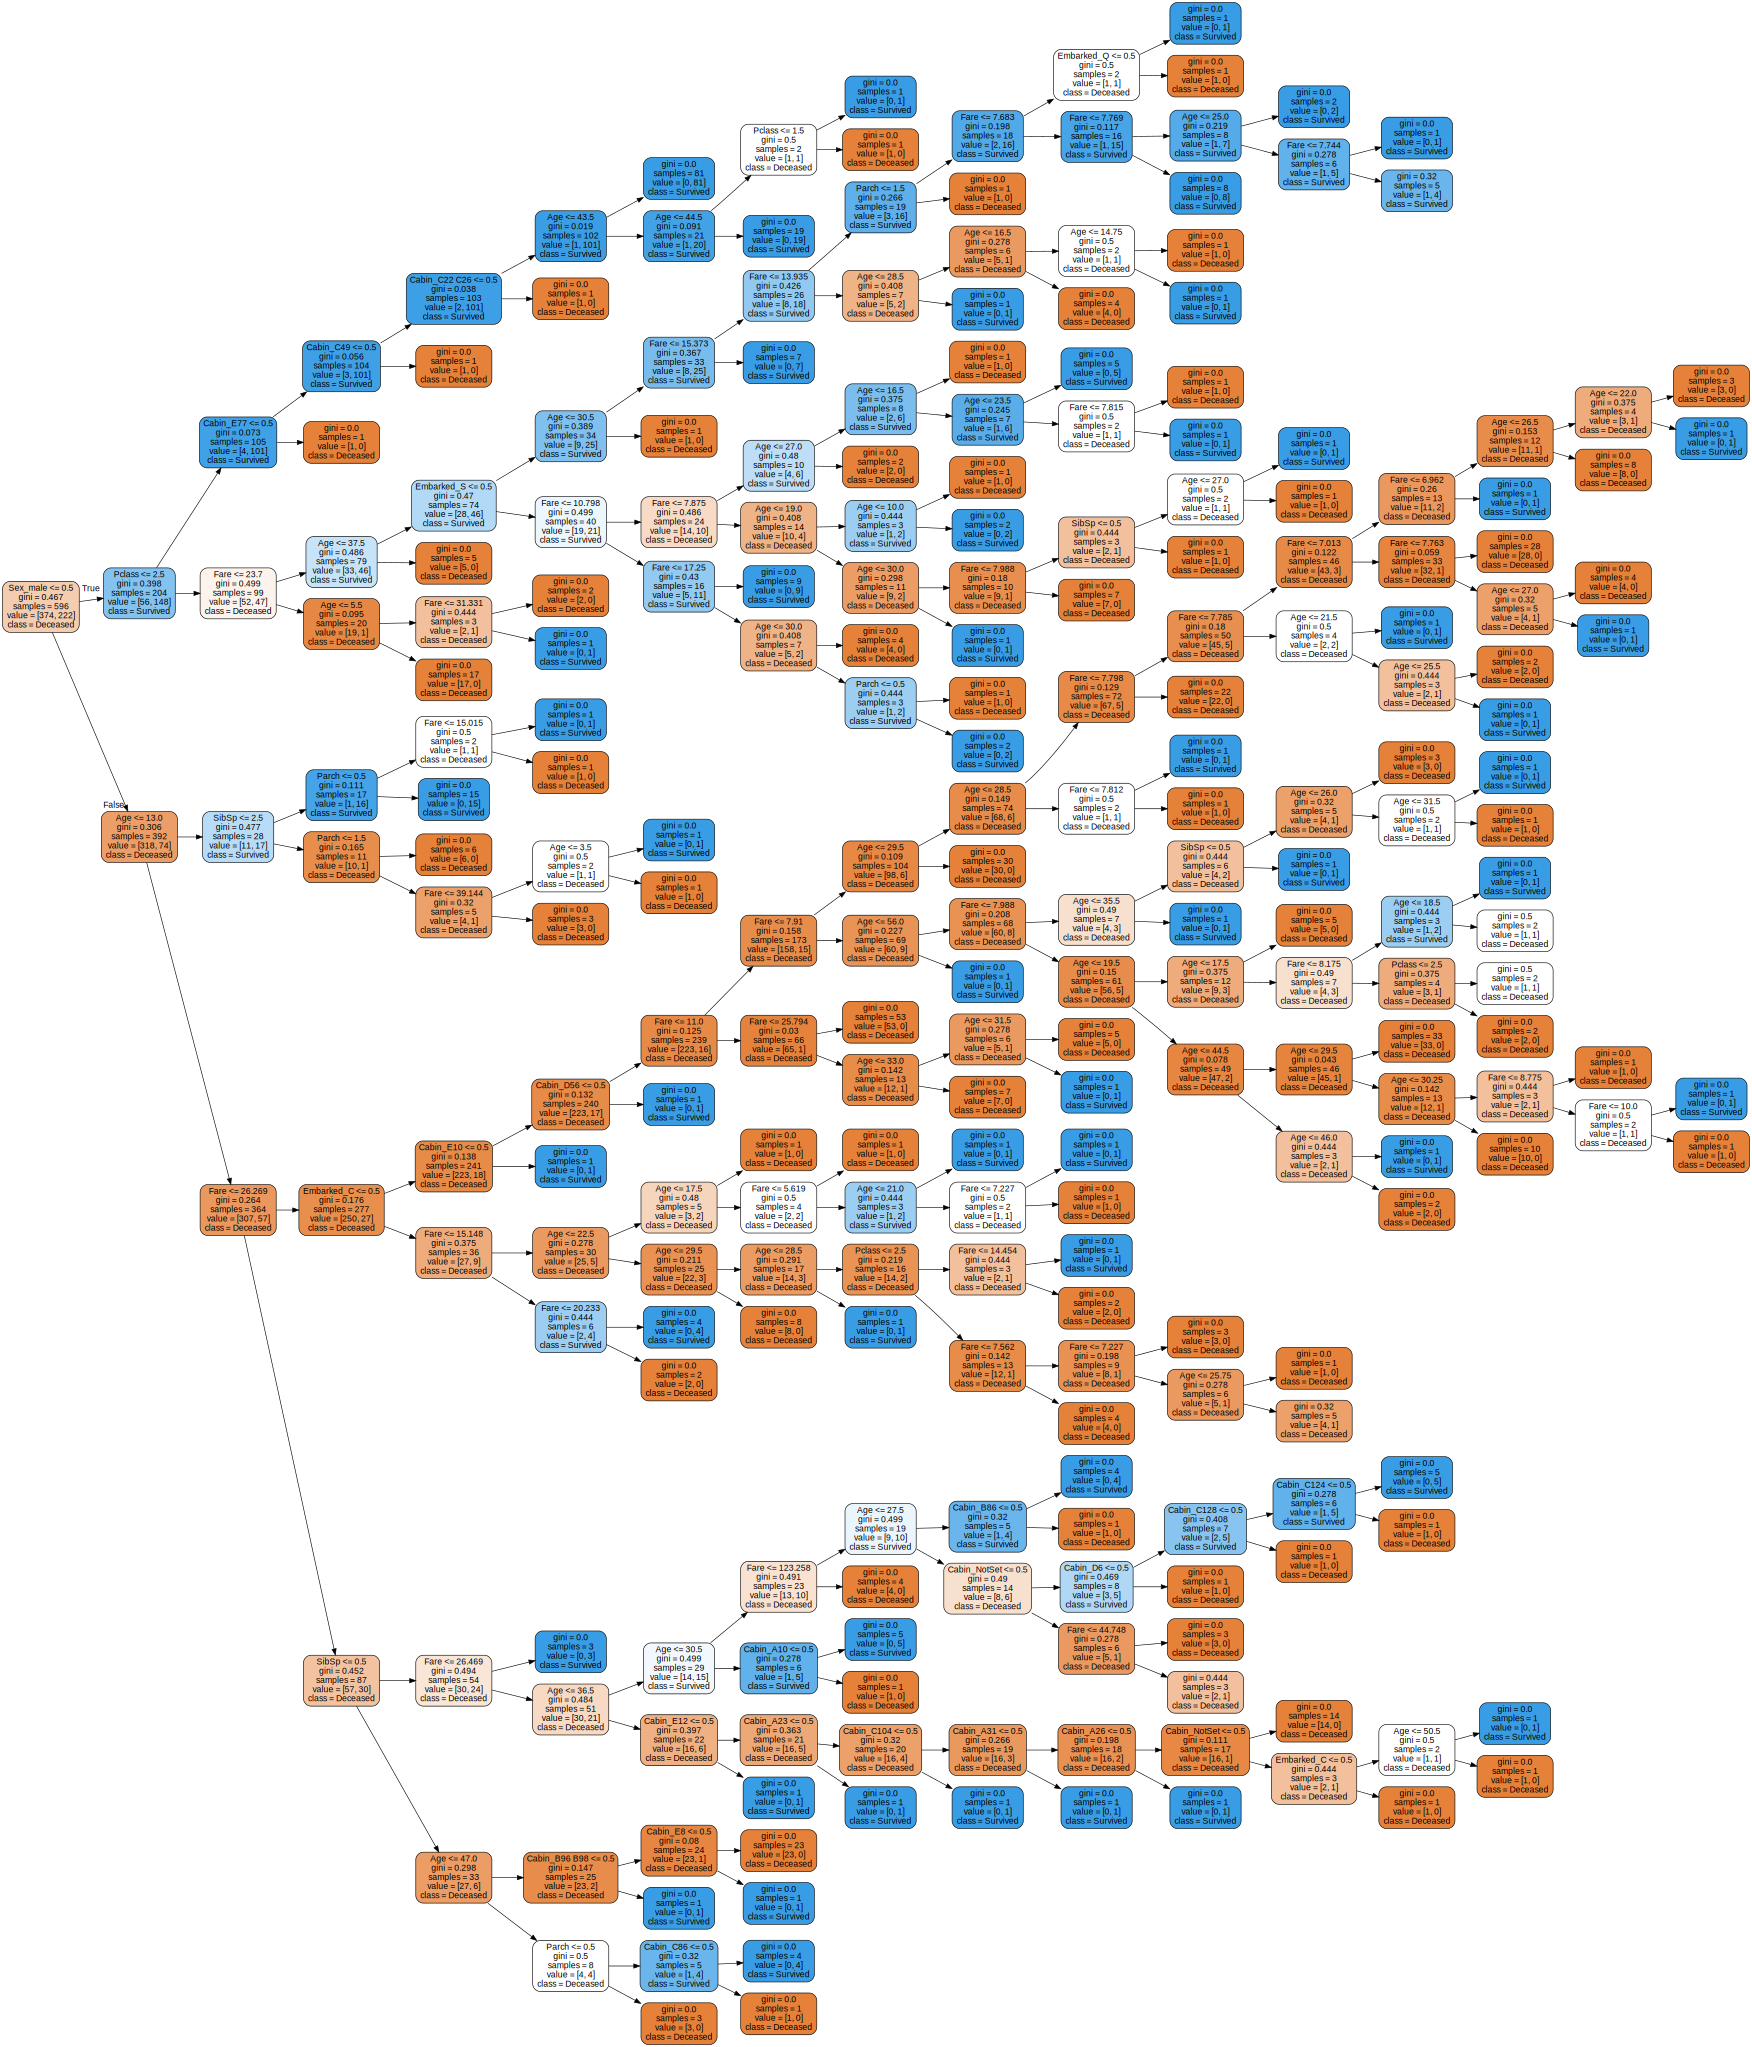

In [22]:
# AQUI SE GENERA EL ARBOL DE DECISION DEL DATASET DEL TITANIC
#Show the generated tree
plottree(decisiontree, features_names=Xtrain.columns, class_names=["Deceased", "Survived"])